# Cross Validation
CV is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the avalaible data.

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

boston = pd.read_csv('Boston.csv')
X = boston.drop('MEDV',axis=1).values # drop the target
y = boston['MEDV'].values #keep the target
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv = 5) #fold(CV) = 5
print(cv_results)
print("Average 5-fold CV score:{}".format(np.mean(cv_results)))

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Average 5-fold CV score:0.3532759243958813


### K-fold Comparison
CV is esential but the more folds are used, the more computation increases. We can test this using magic function
%timeit.

In [3]:
cv_results =%timeit cross_val_score(reg, X, y, cv = 3) #fold(CV) = 3

5.77 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
cv_results =%timeit cross_val_score(reg, X, y, cv = 10) #fold(CV) = 10

25 ms ± 3.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Regularized Regression

### Why regularize?
- Linear Regression minimizes a loss function. It chooses a co-efficient for each feature variable. Large co-efficient for each feature variable which leads to overfitting.
- To penalize large co-efficients, regularization is used.

# Types of Regularization
## Type 1: ridge regression

- Loss function = Ordinary Loss Function (OLS) + $\alpha* \sum_{i=1}^n a_i^2$
- $\alpha$: parameter, we need to choose as in picking k in k-NN, called as Hyperparameter tuning.
- this parameter controls complexity ie $\alpha= 0$ will lead to underfitting and for large $\alpha$, we will get overfitting.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import pandas as pd

boston = pd.read_csv('Boston.csv')
X = boston.drop('MEDV',axis=1).values # drop the target
y = boston['MEDV'].values #keep the target
X_train, X_test = (X[:400],X[400:])
y_train, y_test = (y[:400],y[400:])
ridge = Ridge(alpha = 0.1, normalize = True) # to maintain same scaling normalize = True
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test,y_test)

-0.024699311788555

## Type 1: Lasso regression
- Loss function = Ordinary Loss Function (OLS) + $\alpha* \sum_{i=1}^n |a_i|$
- $\alpha$: parameter, we need to choose as in picking k in k-NN, called as Hyperparameter tuning.
- this parameter controls complexity ie $\alpha= 0$ will lead to underfitting and for large $\alpha$, we will get overfitting.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import pandas as pd

boston = pd.read_csv('Boston.csv')
X = boston.drop('MEDV',axis=1).values # drop the target
y = boston['MEDV'].values #keep the target
X_train, X_test = (X[:400],X[400:])
y_train, y_test = (y[:400],y[400:])
lasso = Lasso(alpha = 0.1, normalize = True) # to maintain same scaling normalize = True
lasso.fit(X_train,y_train)
lasso_pred = ridge.predict(X_test)
lasso.score(X_test,y_test)

-0.7221666629913277

## Lasso Regression for feature Selection
- Can be used to select important features of a dataset
- shrinks the co-efficients of less important features to 0

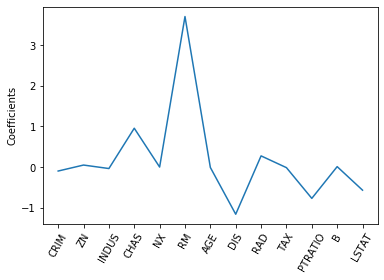

In [20]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
names = boston.drop('MEDV', axis =1).columns
lasso = Lasso(alpha = 0.1)
lasso_coeff = lasso.fit(X,y).coef_
_ = plt.plot(range(len(names)),lasso_coeff)
_ = plt.xticks(range(len(names)), names, rotation = 60)
_ = plt.ylabel('Coefficients')
plt.show()

Clearly, we can rm is the best feature.

Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

In [21]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    std_error = cv_scores_std / np.sqrt(10)
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

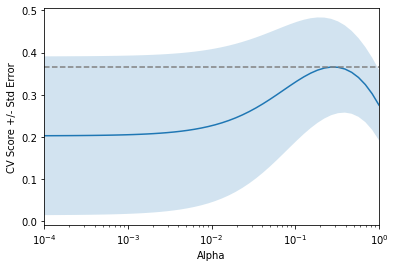

In [8]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)